In [1]:
import pandas as pd
from pymongo import MongoClient
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = (15,5)
plt.style.available
plt.style.use('seaborn-white')

pd.set_option('display.width',5000)
pd.set_option('display.max_columns',60)
import warnings
warnings.filterwarnings("ignore")

In [3]:
# checking our features in MongoDB Compass
# client = MongoClient('localhost', 27017)
# db = client["usecase3"]

## Exctracting data from csv and json file

In [4]:
pdir = r"/Users/prashant/Desktop/PMI DATASET/UseCase_3_Datasets/"

sales_granular = pdir + r"/sales_granular.csv"
sales_granular_csv = open(sales_granular)
dfc = csv.reader(sales_granular_csv, delimiter=',')


In [5]:
dt = next(dfc)
dt_set = [t.split()[-1] for t in dt]
dt = list(set(dt_set))
dt.remove('store_code')

In [6]:
ts = {}
for tim in dt:
    ts[t] = [index for index, value in enumerate(dt_set) if value == t]


In [7]:
sales_granular_dict = {}
for row in dfc:
    store_code = int(row[0])
    total_sales = {}

    for t in ts:
        sum = 0
        for index in ts[t]:
            if not row[index] == "":
                sum += eval(row[index])
        total_sales[t] = sum

    #sales = [eval(sale) for sale in row[1:] if not sale == ""]
    #total_sales = sum(sales)
    sales_granular_dict[store_code] = total_sales


In [30]:
## Importing Surrounding.json and converting it to a dataframe
surroundings = pdir + r"/Surroundings.json"
surroundings_json = open(surroundings)
dfj = pd.read_json(surroundings_json)


In [9]:
l=[]
for index, row in dfj.iterrows():
    store_code = row["store_code"]
    surrounding = row["surroundings"]
    if store_code in sales_granular_dict.keys():
        #print(store_code)
        d = sales_granular_dict[store_code]
        # print(d.keys())
        for t in d:
            document = {}
            document["store_code"] = row["store_code"]
            for key, value in row["surroundings"].items():
                document[key] = len(value)
            document["time"] = eval(t.split(":")[0])
            #print(document["time"])
            document["total_sale"] = d[t]
              #print(document)
            #db.dataset_time.insert_one(document)
            l.append(document)


In [10]:
#Creating a datafram of our data
df= pd.DataFrame(l)

In [11]:
#rearraging the columns
df= df[['store_code','accounting', 'airport', 'amusement_park', 'aquarium', 'art_gallery', 'atm', 'bakery', 'bank', 'bar', 'beauty_salon', 'bicycle_store', 'book_store', 'bowling_alley', 'bus_station', 'cafe', 'campground', 
        'car_dealer', 'car_rental', 'car_repair', 'car_wash', 'casino', 'cemetery', 'church', 'city_hall', 'clothing_store', 'convenience_store', 'courthouse', 'dentist', 'department_store', 'doctor', 'electrician', 
        'electronics_store', 'embassy', 'fire_station', 'florist', 'funeral_home', 'furniture_store', 'gas_station', 'gym', 'hair_care', 
        'hardware_store', 'hindu_temple', 'home_goods_store', 'hospital', 'insurance_agency', 
        'jewelry_store', 'laundry', 'lawyer', 'library', 'liquor_store', 'local_government_office', 
        'locksmith', 'lodging', 'meal_delivery', 'meal_takeaway', 'mosque', 'movie_rental', 'movie_theater', 'moving_company',
        'museum', 'night_club', 'painter', 'park', 'parking', 'pet_store', 'pharmacy', 'physiotherapist', 'plumber', 'police', 'post_office', 
        'real_estate_agency', 'restaurant', 'roofing_contractor', 'rv_park', 'shoe_store', 'shopping_mall', 'spa', 'stadium', 'storage', 'store', 
         'subway_station', 'synagogue', 'taxi_stand', 'train_station', 'transit_station', 'travel_agency', 'university', 'veterinary_care', 'zoo', 'time', 'total_sale']]

In [12]:
df.head(3)

,store_code,accounting,airport,amusement_park,aquarium,art_gallery,atm,bakery,bank,bar,beauty_salon,bicycle_store,book_store,bowling_alley,bus_station,cafe,campground,car_dealer,car_rental,car_repair,car_wash,casino,cemetery,church,city_hall,clothing_store,convenience_store,courthouse,dentist,department_store,...,painter,park,parking,pet_store,pharmacy,physiotherapist,plumber,police,post_office,real_estate_agency,restaurant,roofing_contractor,rv_park,shoe_store,shopping_mall,spa,stadium,storage,store,subway_station,synagogue,taxi_stand,train_station,transit_station,travel_agency,university,veterinary_care,zoo,time,total_sale
0,10055,3,0,0,0,1,1,3,3,1,4,1,0,0,2,6,0,0,0,2,0,0,0,0,0,3,0,0,3,0,...,2,0,1,0,3,6,0,0,1,7,17,0,0,0,0,1,0,1,31,0,0,0,0,2,1,0,1,0,13,1890
1,10055,3,0,0,0,1,1,3,3,1,4,1,0,0,2,6,0,0,0,2,0,0,0,0,0,3,0,0,3,0,...,2,0,1,0,3,6,0,0,1,7,17,0,0,0,0,1,0,1,31,0,0,0,0,2,1,0,1,0,4,0
2,10055,3,0,0,0,1,1,3,3,1,4,1,0,0,2,6,0,0,0,2,0,0,0,0,0,3,0,0,3,0,...,2,0,1,0,3,6,0,0,1,7,17,0,0,0,0,1,0,1,31,0,0,0,0,2,1,0,1,0,12,2370


In [13]:
#Creating input feature vector
X= df.drop(labels=['store_code','total_sale'],axis=1)
predictors= X.columns
X=X.values
x1= X[:10,:]
X.shape


(12960, 90)

In [14]:
# Creating oputput feature vector >> total_sale
y=df['total_sale']
y=y.values
y.shape

(12960,)

## Feature scaling 

In [15]:
# Scaling  the inpur features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X)
##summerize the transformed data
np.set_printoptions(precision=3)
#print(rescaledX[0:5,:])
rescaledX.shape


(12960, 90)

### Shuffle and Split Data
 All numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.



In [16]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'total_sale' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(rescaledX,y, test_size = 0.2, random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))
print ("Testing set has {} samples.".format(y_train.shape[0]))
print ("Testing set has {} samples.".format(y_test.shape[0]))



Training set has 10368 samples.
Testing set has 2592 samples.
Testing set has 10368 samples.
Testing set has 2592 samples.


In [17]:
## Applying Ridge regression to our model
# from sklearn.linear_model import Ridge
# X_train, X_test, y_train, y_test = train_test_split(rescaledX,y,test_size=0.20,random_state=42)

# ridge = Ridge(alpha=0.1)

# ridge.fit(X_train,y_train)
# redge_pred= ridge.predict(X_test)
# ridge.score(X_test,y_test)

# Understanding the important features using Lasso Model

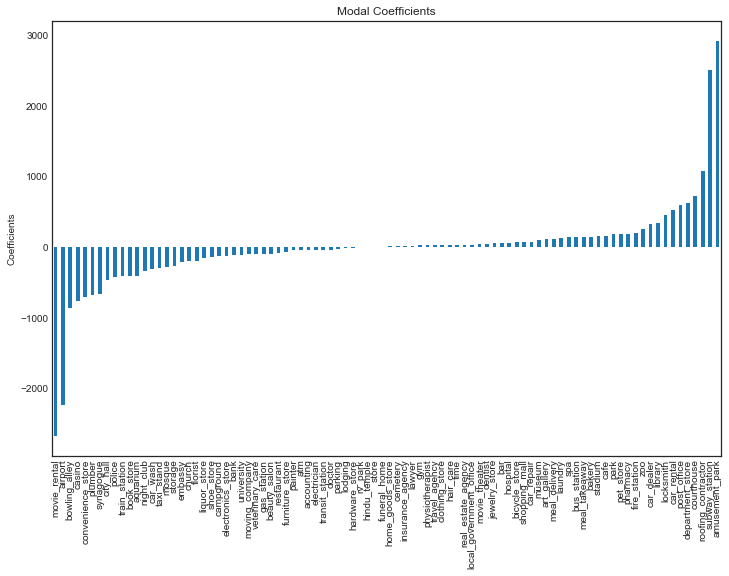

In [19]:

from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
lasso_pred=lasso.predict(X_test)
lasso.score(X_test,y_test)
lasso_coef = lasso.fit(X, y).coef_ 
#plot = plt.plot(range(len(predictors)), lasso_coef) 
x_tick= plt.xticks(range(len(predictors)), predictors, rotation=90)
y_tick = plt.ylabel('Coefficients')
coef = pd.Series(lasso.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients',figsize=(12,8))
# coef

plt.savefig("figure1.png")

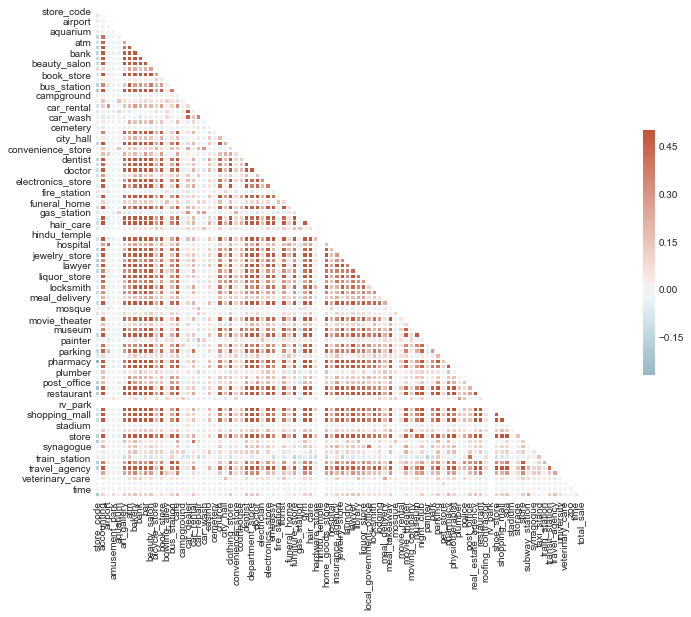

In [20]:
## Plotting the correlation between the features
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .5})

## Applying Random Forest algorithm

In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)

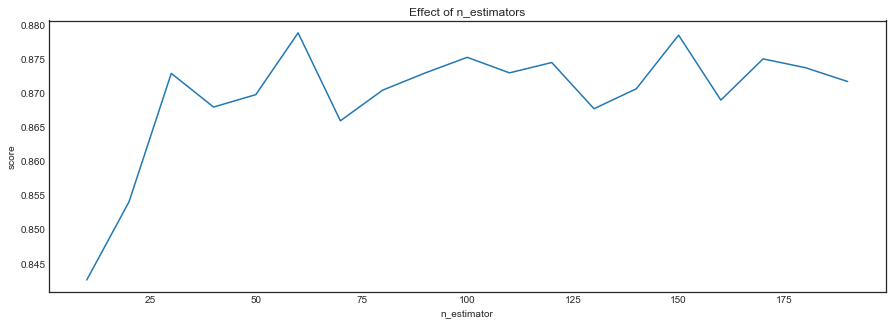

In [22]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)



In [24]:
from sklearn import metrics
score=model.score(X_test,y_test)
predictions=model.predict(X_test)


In [25]:
predicted= model.predict(X_test)

In [26]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,predicted)  
print("Explained Variance Score is {}".format(explained_variance_score(y_test,predicted)))

Explained Variance Score is 0.8717412222435514


In [27]:
from sklearn.metrics import r2_score
print("Coefficient of Determination i.e. R2 score : {}".format(r2_score(y_test,predicted)))

Coefficient of Determination i.e. R2 score : 0.8716412782900973


# Feature Importance
An important task when performing supervised learning on a dataset like the sales data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do.




### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, we will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

In [28]:
### Import a supervised learning model that has 'feature_importances_'
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor()

#Train the supervised model on the training set 
clf.fit(X_train, y_train)

#Extract the feature importances
feature_importance= clf.feature_importances_

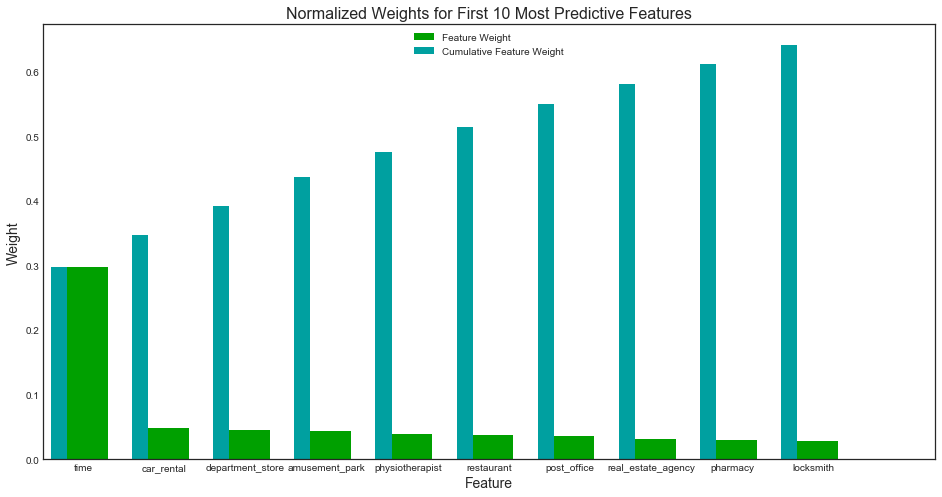

In [29]:
 # Display the five most important features
indices = np.argsort(feature_importance)[::-1]
columns = predictors.values[indices[:10]]
values = feature_importance[indices][:10]
#create the plot
fig = plt.figure(figsize = (16,8))
plt.title("Normalized Weights for First 10 Most Predictive Features", fontsize = 16)
plt.bar(np.arange(10), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
plt.bar(np.arange(10) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
plt.xticks(np.arange(10), columns)
plt.xlim((-0.5, 10.5))
plt.ylabel("Weight", fontsize = 14)
plt.xlabel("Feature", fontsize = 14)
    
plt.legend(loc = 'upper center')
plt.savefig("fig2.png")

By using using the Gradient Boosting Regressor we can get the understanding of the important features in the data.
To drive the sales at the point of sale (POS), top 5 attributes are 

1. Time ( Hourly sales)
2. Car rental service
3. Department store 
4. Amusement park
5. Physiotherapist



By looking at the important features we can have better predactibility of the sales in the given region. We can focus more on the such  attributes while taking any decisions related to the business. 
